# Base model

In [2]:
import sys
import os
import importlib
# make the module available from the src directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.models.baseModels.resnet_regression import ResNetModel
importlib.reload(sys.modules['src.models.baseModels.resnet_regression'])

resnet = ResNetModel(data_dir='../datasets/artificial_data/ExtremeNoise2dGenerator_images', num_epochs=10, depth=34)
resnet.load_data()
resnet.train()
resnet.evaluate()

Epoch 1/10, Train Loss: 246814.75608673095, Val Loss: 985636.808996582
Epoch 2/10, Train Loss: 523.8996292114258, Val Loss: 1615.02841796875
Epoch 3/10, Train Loss: 524.5374687194824, Val Loss: 1713.8963989257813
Epoch 4/10, Train Loss: 508.96474380493163, Val Loss: 1704.5512817382812
Epoch 5/10, Train Loss: 563.2965789794922, Val Loss: 1814.5390930175781
Early stopped at epoch: 5
Loss of the network on the test images: 3933.8676147460938


Original Image Shape: (256, 256, 3)


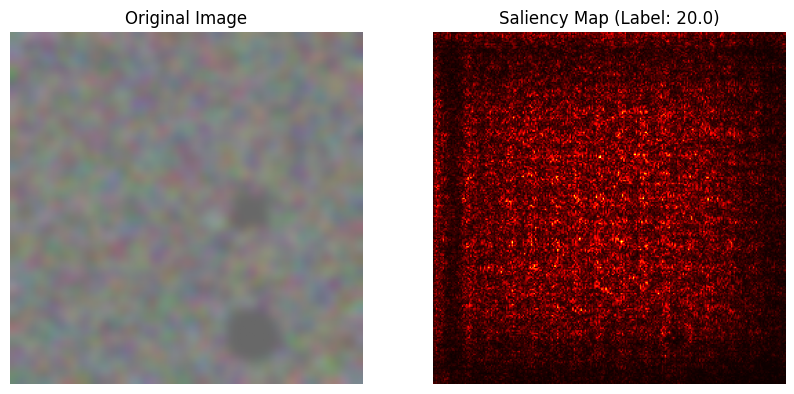

Original Image Shape: (256, 256, 3)


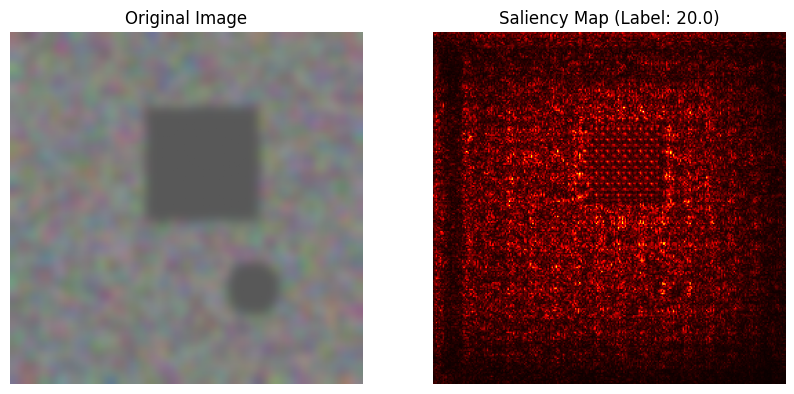

Original Image Shape: (256, 256, 3)


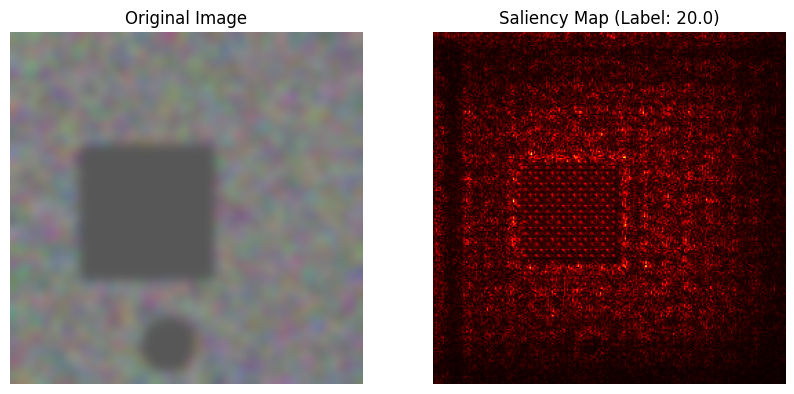

Original Image Shape: (256, 256, 3)


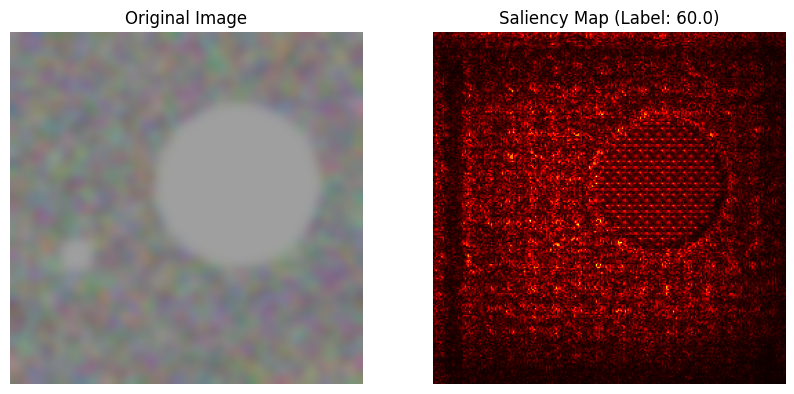

Original Image Shape: (256, 256, 3)


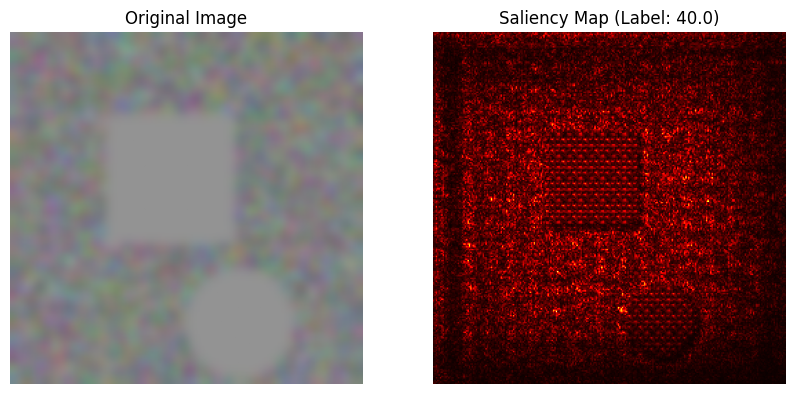

Original Image Shape: (256, 256, 3)


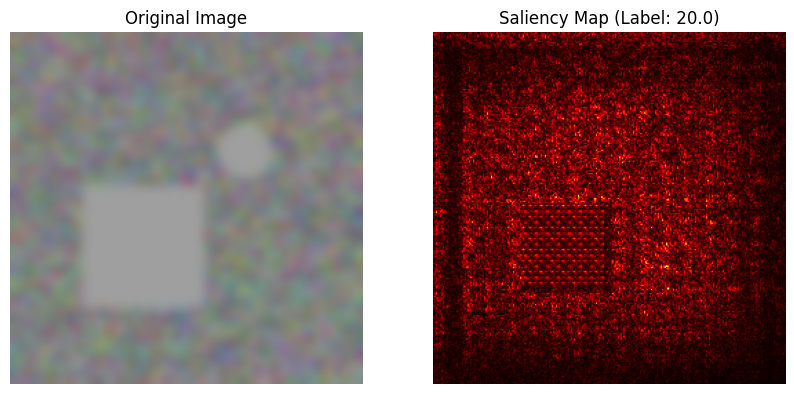

Original Image Shape: (256, 256, 3)


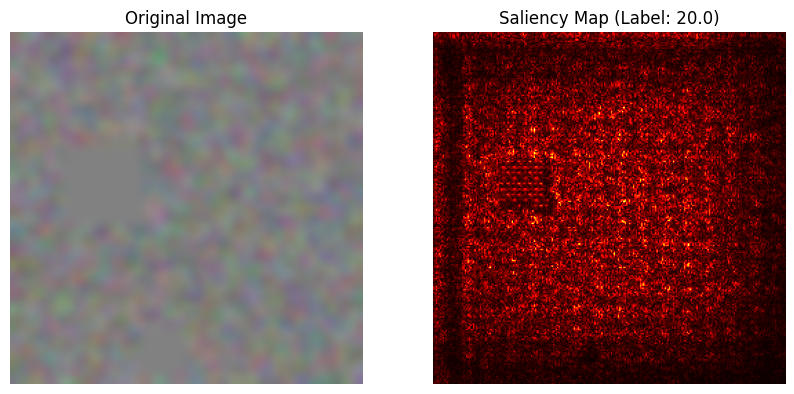

Original Image Shape: (256, 256, 3)


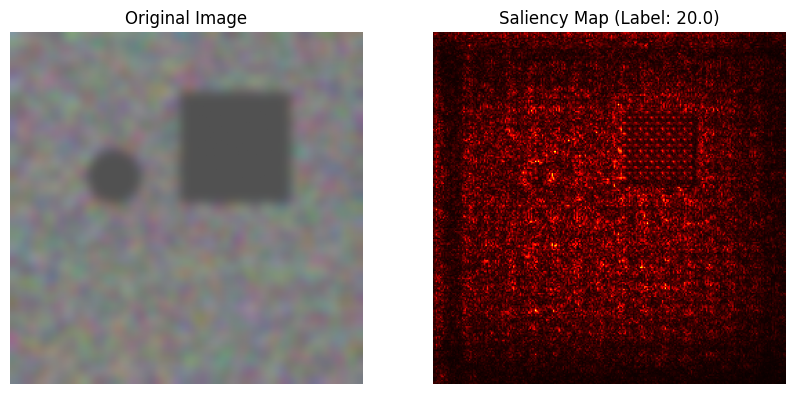

Original Image Shape: (256, 256, 3)


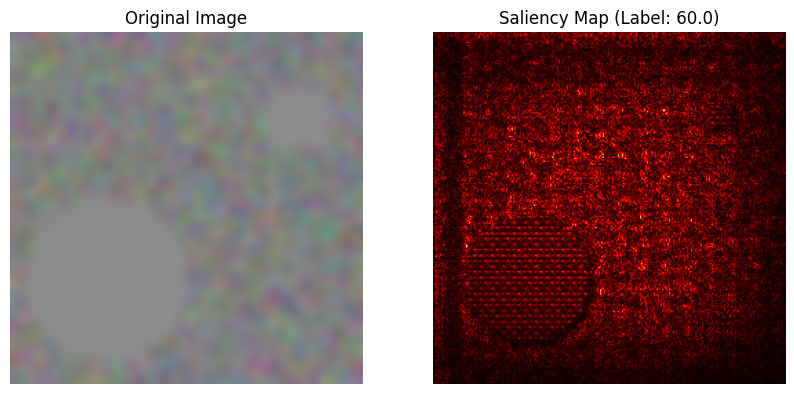

Original Image Shape: (256, 256, 3)


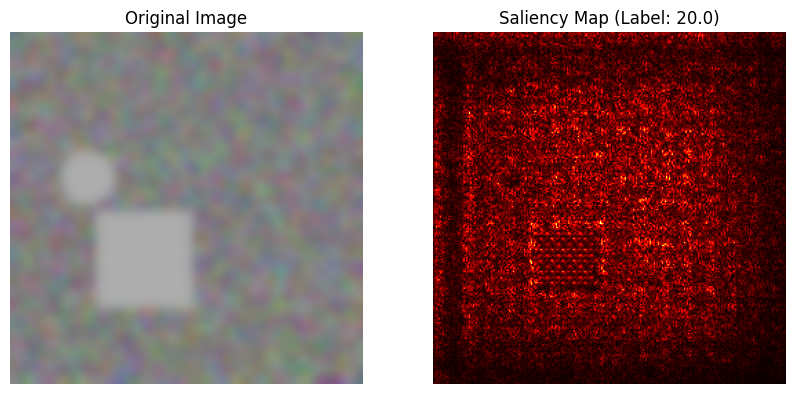

In [6]:
from src.XAI.XAI import XAIResNet

# Assuming XAIResNet was already imported previously
importlib.reload(sys.modules['src.XAI.XAI'])

# Initialize XAI instance
xai_resnet = XAIResNet(modelWrapper=resnet, device=resnet.device)
xai_resnet.get_saliency_maps(image_count=10)